# Springboard 2019 - Capstone

## Exploratory Data Analysis (EDA)


### Background
The following EDA steps were conducted to explore online professional profiles (OPP) information on recent graduates in Canada and the U.S. to uncover patterns and trends as part of my capstone project for the Springboard Intermediate Python for Data Science course. The data was pulled from a private data vendor and includes data on employers, career paths, start dates, education (majors, degrees, etc.) and skills of youth / recent graduates. The final project will investigate skill cluster themes in relation to students' education and career paths.

* Primary project question: How are skills showing up in talent supply in the U.S. and Canada? 

Guiding Assignment Questions: 
1. Are there variables that are particularly significant in terms of explaining the answer to your project question?
2. Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? 

### Code

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

#read in data file
df = pd.read_csv('SB19-Can-US-Main.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,id,country,job_1,job_2,job_3,job_4,job_5,job_6,employer_1,employer_2,...,degree_2_type,degree_3_type,degree_4_type,job_count,degree_count,time_job_2,time_job_3,time_job_4,time_job_1_4,skill_list
0,UvVMY-N9uT9i6wdg8nX-sQ_0000,US,adjunct faculty,chemist,NaN,NaN,NaN,NaN,dixie state university,washington county water conservancy district,...,NaN,NaN,NaN,2,1,1.0,NaN,NaN,NaN,"microsoft office,microsoft word,powerpoint,res..."
1,1fFD-E25MpwW8uvA0gwOWw_0000,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ot,NaN,NaN,0,2,NaN,NaN,NaN,NaN,"household,writing,reflection,transferring,admi..."
2,wRdXL4mwhnUGdwg7eVAFYQ_0000,US,marketing associate,product manager,NaN,NaN,NaN,NaN,new york life insurance company,american express,...,NaN,NaN,NaN,2,1,5.0,NaN,NaN,NaN,"facebook,management,powerpoint,social media,ma..."
3,gMzn1TIgTl-etAKXbJipZQ_0000,US,summer intern,internship,software engineer,NaN,NaN,NaN,itri,itri,...,ma,NaN,NaN,3,2,2.0,2.0,NaN,NaN,"matlab,python,objective c,r,machine learning,n..."
4,IrpjwrXdzNecrwwzdTH1-w_0000,US,maintance,mechanic,mechanic,maintenance worker,NaN,NaN,toyotaid,rosnett trucking,...,se,Ot,NaN,4,3,1.0,4.0,1.0,6.0,hoists


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753315 entries, 0 to 753314
Data columns (total 53 columns):
id                  753315 non-null object
country             753315 non-null object
job_1               600101 non-null object
job_2               513927 non-null object
job_3               430154 non-null object
job_4               338815 non-null object
job_5               250366 non-null object
job_6               174365 non-null object
employer_1          599972 non-null object
employer_2          517602 non-null object
employer_3          436531 non-null object
employer_4          349101 non-null object
employer_5          263586 non-null object
employer_6          188717 non-null object
job_start_year_1    602643 non-null float64
job_start_year_2    515466 non-null float64
job_start_year_3    431095 non-null float64
job_start_year_4    339270 non-null float64
job_start_year_5    250514 non-null float64
job_start_year_6    174248 non-null float64
industry_list_1     617

In [45]:
# create columns to indicate level of education experience
df['ba'] = np.where((df['degree_1_type'] == 'ba') | (df['degree_2_type'] == 'ba') | (df['degree_3_type'] == 'ba') | (df['degree_4_type'] == 'ba'), 
       1, 0)
df['ma'] = np.where((df['degree_1_type'] == 'ma') | (df['degree_2_type'] == 'ma') | (df['degree_3_type'] == 'ma') | (df['degree_4_type'] == 'ma'), 
       1, 0)
df['do'] = np.where((df['degree_1_type'] == 'do') | (df['degree_2_type'] == 'do') | (df['degree_3_type'] == 'do') | (df['degree_4_type'] == 'do'), 
       1, 0)
df['Ot'] = np.where((df['degree_1_type'] == 'Ot') | (df['degree_2_type'] == 'Ot') | (df['degree_3_type'] == 'Ot') | (df['degree_4_type'] == 'Ot'), 
       1, 0)

df.head()

,id,country,job_1,job_2,job_3,job_4,job_5,job_6,employer_1,employer_2,...,degree_count,time_job_2,time_job_3,time_job_4,time_job_1_4,skill_list,ba,ma,do,Ot
0,UvVMY-N9uT9i6wdg8nX-sQ_0000,US,adjunct faculty,chemist,NaN,NaN,NaN,NaN,dixie state university,washington county water conservancy district,...,1,1.0,NaN,NaN,NaN,"microsoft office,microsoft word,powerpoint,res...",1,0,0,0
1,1fFD-E25MpwW8uvA0gwOWw_0000,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,"household,writing,reflection,transferring,admi...",0,0,0,1
2,wRdXL4mwhnUGdwg7eVAFYQ_0000,US,marketing associate,product manager,NaN,NaN,NaN,NaN,new york life insurance company,american express,...,1,5.0,NaN,NaN,NaN,"facebook,management,powerpoint,social media,ma...",1,0,0,0
3,gMzn1TIgTl-etAKXbJipZQ_0000,US,summer intern,internship,software engineer,NaN,NaN,NaN,itri,itri,...,2,2.0,2.0,NaN,NaN,"matlab,python,objective c,r,machine learning,n...",1,1,0,0
4,IrpjwrXdzNecrwwzdTH1-w_0000,US,maintance,mechanic,mechanic,maintenance worker,NaN,NaN,toyotaid,rosnett trucking,...,3,1.0,4.0,1.0,6.0,hoists,0,0,0,1


In [4]:
# for EDA, we start with exploring trends in quantitative fields

## time between jobs 1 and 4 to quantify work experience
df.time_job_1_4.describe()

count    339270.000000
mean          4.535046
std           3.229694
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max         114.000000
Name: time_job_1_4, dtype: float64

In [5]:
# to simplify this stage of EDA, we'll start with one graduation cohort

# look at distribution of graduate years
df.grad_1.describe()

count    753315.000000
mean       2013.069669
std           2.575103
min        2008.000000
25%        2011.000000
50%        2013.000000
75%        2015.000000
max        2024.000000
Name: grad_1, dtype: float64

In [46]:
# select one cohort --> those who completed education in 2013
df_2013 = df[df.grad_1 == 2013]
# look at distribution of time across 1-4 jobs for those graduating in 2013
## here we have a wide range of graduates and work experience
df_2013.time_job_1_4.describe()

count    52936.000000
mean         4.492859
std          3.143804
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         54.000000
Name: time_job_1_4, dtype: float64

In [47]:
# what kinds of degrees do they have for first degree
df_2013.degree_1_type.value_counts()

ba    60544
se    22318
Ot    20066
as    11475
Name: degree_1_type, dtype: int64

In [49]:
# differentiate between highschool students and young professionals who graduated in 2013
df_2013.head()

# highschool students in 2013 ONLY have secondary education in 2013
df_2013_youth = df_2013[(df_2013.degree_1_type == 'se') & (df_2013.degree_count == 1)]

In [50]:
df_2013_youth.head()
df_2013_youth.shape

(6863, 57)

In [53]:
## Note: 6,863 youth in our dataset graduated in 2013 with only secondary education (approx. 1% of sample)

# young professionals in 2013 have more than secondary education in 2013
df_2013_yprofs = df_2013[df_2013.degree_1_type != 'se']
df_2013_yprofs.head()

,id,country,job_1,job_2,job_3,job_4,job_5,job_6,employer_1,employer_2,...,degree_count,time_job_2,time_job_3,time_job_4,time_job_1_4,skill_list,ba,ma,do,Ot
9,FLrGKPbBhoUIWgNzmGwrEg_0000,US,vice president of communication,partner,junior developer,software developer,NaN,NaN,aiesec in the united states,j flores enterprise,...,2,2.0,3.0,1.0,6.0,"leadership,powerpoint,social media,digital sur...",1,0,0,1
22,hoDqOmPeNqjZGpQgTmnCtg_0000,US,server,server,sever/bartender,public announcer/tournament organizer and volu...,dj/ writer / work study,professional communication consultant & manager,wholly guacamole,international house of pancakes,...,2,1.0,2.0,6.0,9.0,"food service,sports,bartending,radio productio...",1,0,0,0
23,kwrjc6CWgbvJuVJYXWdB7w_0000,US,data entry specialist,account manager,administrative assistant,co-owner,asset and business manager,NaN,horizon fitness,microsoft,...,2,1.0,1.0,1.0,3.0,"fast learner,mysql,javaserver pages,powerpoint...",0,0,0,0
32,FhmCzYo-BWWfmOBalACc4Q_0000,US,radiation therapist,NaN,NaN,NaN,NaN,NaN,us oncology,NaN,...,1,NaN,NaN,NaN,NaN,"research,cancer,radiation therapy,powerpoint",1,0,0,0
34,ZnLOAQ7HvtwVpjjoDvZwEQ_0000,US,power electronics engineer intern,graduate research assistant,investigator,"intelligent vehicle engineer, grid/localizatio...",slam and control algorithms consultant,autonomous driving application engineer,state grid corporation of china,arizona state university,...,2,1.0,1.0,2.0,4.0,"powerpoint,linux,algorithms,self driving car,c...",1,1,0,0


In [54]:
df_2013_yprofs.shape

(92085, 57)

### Summary Statistics - Work & Education Experience

Motivation and Methodology Overview: 
* First, we hypothesize that the following variables may influence level and/or structure of skills as reported by recent graduates in the data: 
     number of jobs, 
     years of work experience, 
     number of credentials/degrees, 
     level of education, and 
     discipline of education.
* Second, in order to quantify these relationships without having access to the structure of skills (which right now are lists in columns - will be brought out in further stages of the analysis), we'll attempt to quantify by evaluating one cohort by graduation year: 2013. 

Key Findings and Summary Statistics on our 2013 Cohort: 

* _Median and Distribution of # of Jobs:_ The median number of jobs held by these recent graduates is 6 jobs, with a standard deviation of 0.84. The max number of jobs shown in the data is 6. 

* _Years of Work Experience:_ By looking at the time spent between job 1 and 4, the median number of years is 4 years, which indicates a high turnover rate, with a standard deviation of 3.3. 

* _Number of Credentials / Degrees:_ The median number of credentials / degree held by these recent graduates is 2 degrees, with a standard deviation of 0.8. The maximum number is 4. 

* _Level of Education:_ We found that 92% of our sample have a bachelor's degree, 18% have a master's, 3% have a doctorate, and 41% have some Other kind of credential. 

Primary Finding (to be continued): 
* Until our dependent variable of "skills" is properly structured through clustering, we are limited in what we can do for inferential statistics, since we don't have a clean variable to measure effects from other variables on. The analysis that follows, explores data in more depth to continue the "data story" from the previous step in better understanding some of the trends. 


In [90]:
# job count
df_2013_yprofs.job_count.describe()

count    43257.000000
mean         5.249809
std          0.840868
min          4.000000
25%          4.000000
50%          6.000000
75%          6.000000
max          6.000000
Name: job_count, dtype: float64

In [89]:
df_2013_yprofs.job_count.median()

6.0

In [88]:
# time spent between jobs 1 and 4
df_2013_yprofs.time_job_1_4.describe()

count    43257.000000
mean         4.438750
std          2.543309
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_job_1_4, dtype: float64

In [87]:
# look at median work experience
df_2013_yprofs.time_job_1_4.median()

4.0

In [86]:
# number of credentials
df_2013_yprofs.degree_count.describe()

count    43257.000000
mean         1.921076
std          0.894760
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: degree_count, dtype: float64

In [85]:
df_2013_yprofs.degree_count.median()

2.0

In [80]:
# level of education
## bachelors --> (93%)
df_2013_yprofs.ba.value_counts(normalize=True)

1    0.925006
0    0.074994
Name: ba, dtype: float64

In [81]:
## masters --> (18%)
df_2013_yprofs.ma.value_counts(normalize=True)

0    0.815729
1    0.184271
Name: ma, dtype: float64

In [82]:
# doctorate --> (3%)
df_2013_yprofs.do.value_counts(normalize=True)

0    0.969161
1    0.030839
Name: do, dtype: float64

In [84]:
## associates or Other --> (41%)
df_2013_yprofs.Ot.value_counts(normalize=True)

0    0.587419
1    0.412581
Name: Ot, dtype: float64

In [79]:
## look at common entry level work experience (does it relate to our findings in data storytelling?)
df_2013_yprofs.job_1.value_counts()[:20]

intern                             1109
sales associate                    1100
research assistant                  608
customer service representative     478
cashier                             477
administrative assistant            424
assistant manager                   286
server                              281
office assistant                    216
manager                             213
receptionist                        198
summer intern                       197
sales representative                189
barista                             182
volunteer                           163
lifeguard                           152
teaching assistant                  151
camp counselor                      143
marketing intern                    142
internship                          138
Name: job_1, dtype: int64

In [78]:
# look at more advanced forms of work experience at job 6
df_2013_yprofs.job_6.value_counts()[:20]

intern                             222
research assistant                 193
teaching assistant                 129
sales associate                    123
administrative assistant           105
software engineer                  104
project manager                     99
server                              91
customer service representative     86
account manager                     85
account executive                   75
sales representative                69
software developer                  66
associate                           63
staff accountant                    61
president                           59
graduate teaching assistant         59
project coordinator                 59
marketing coordinator               58
graphic designer                    57
Name: job_6, dtype: int64

In [77]:
# look at distribution of work experience in our sample
df_2013_yprofs.job_count.value_counts()

6    22045
4    11239
5     9973
Name: job_count, dtype: int64

In [76]:
major1_job_count_table = pd.crosstab(index=df_2013_yprofs.major_1_type, columns=df_2013_yprofs.job_count, margins=True)
major1_job_count_table

job_count,4,5,6,All
major_1_type,,,,
Business and Comms,2682,2446,5162,10290
Computer and IT,368,296,534,1198
Construction and Trades,23,26,33,82
"Culture, Language, and Fine Arts",857,828,2219,3904
Health and Education,449,327,654,1430
Law and Government,199,158,287,644
Other,2137,2054,5175,9366
"Science, Math, Eng, and Arch",2287,1907,3589,7783
Social Science,1639,1489,3496,6624


In [91]:
major1_degree_count_table = pd.crosstab(index=df_2013_yprofs.major_1_type, columns=df_2013_yprofs.degree_count, margins=True)
major1_degree_count_table

degree_count,1,2,3,4,All
major_1_type,,,,,
Business and Comms,5545,3313,1063,369,10290
Computer and IT,699,358,108,33,1198
Construction and Trades,51,15,12,4,82
"Culture, Language, and Fine Arts",1669,1470,548,217,3904
Health and Education,568,601,201,60,1430
Law and Government,278,256,65,45,644
Other,15,4855,2860,1636,9366
"Science, Math, Eng, and Arch",3313,3250,924,296,7783
Social Science,2371,3061,886,306,6624


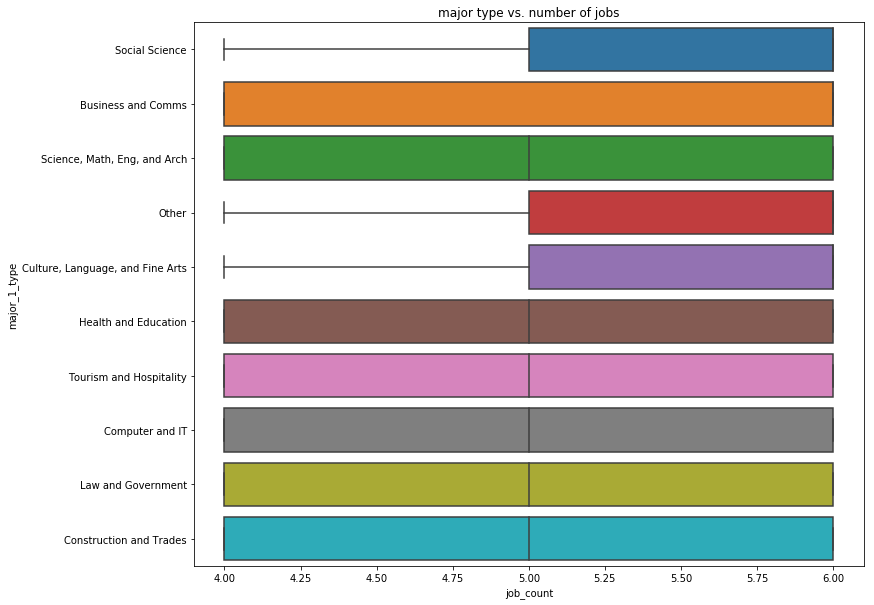

In [113]:
# do degree types / disciplines influence the number of jobs?
_ = plt.figure(figsize=(12,10))
_ = sns.boxplot(y='major_1_type', x='job_count', data = df_2013_yprofs, orient = 'h');
plt.title('major type vs. number of jobs');
plt.show()

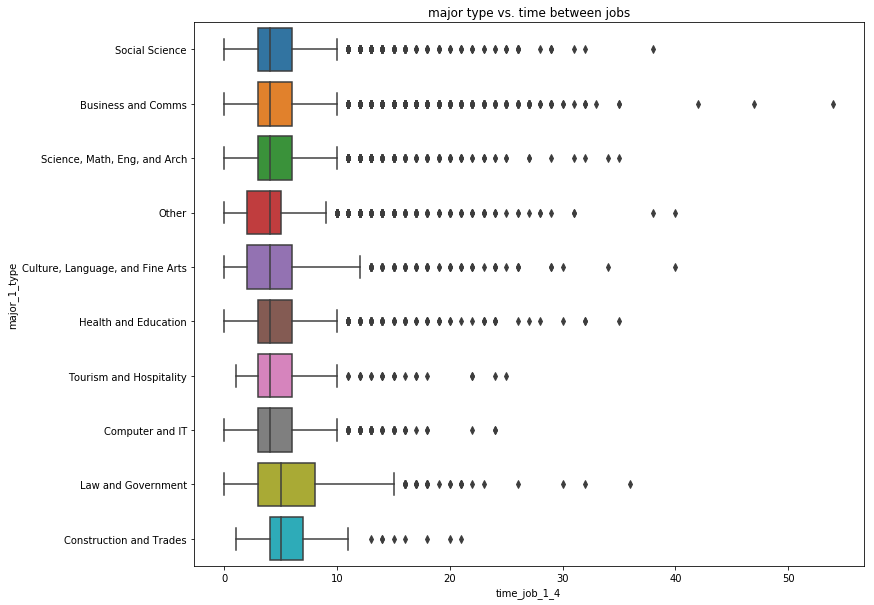

In [72]:
# do degree types / disciplines influence average time spent across jobs?
_ = plt.figure(figsize=(12,10))
_ = sns.boxplot(y='major_1_type', x='time_job_1_4', data = df_2013_yprofs, orient = 'h');
plt.title('major type vs. time between jobs');
plt.show()

In [73]:
## Note the outliers on time between jobs 1 and 4 - if about 15 or above, these are not likely to be recent graduates (and should be evaluated in a different cohort)

df_2013_yprofs = df_2013_yprofs[df_2013_yprofs.time_job_1_4 < 15]
df_2013_yprofs.shape

(43257, 57)

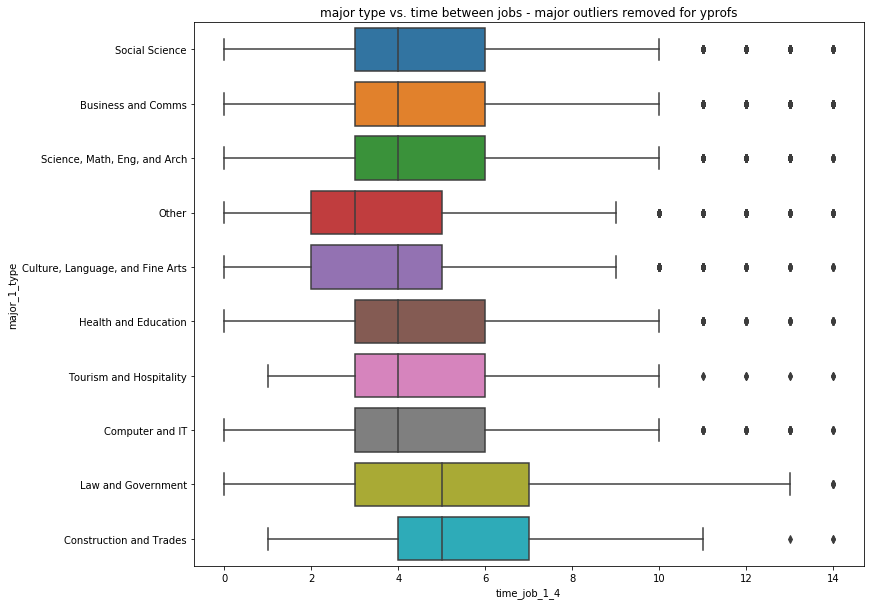

In [75]:
## retry the same boxplot above to see distribution
_ = plt.figure(figsize=(12,10))
_ = sns.boxplot(y='major_1_type', x='time_job_1_4', data = df_2013_yprofs, orient = 'h');
plt.title('major type vs. time between jobs - major outliers removed for yprofs');
plt.show()

In [92]:
df_2013_yprofs.time_job_2.describe()	

count    43257.000000
mean         1.923273
std          1.795904
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         13.000000
Name: time_job_2, dtype: float64

In [93]:
df_2013_yprofs.time_job_3.describe()

count    43257.000000
mean         1.299466
std          1.255197
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: time_job_3, dtype: float64

In [94]:
df_2013_yprofs.time_job_4.describe()

count    43257.000000
mean         1.216011
std          1.189055
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: time_job_4, dtype: float64

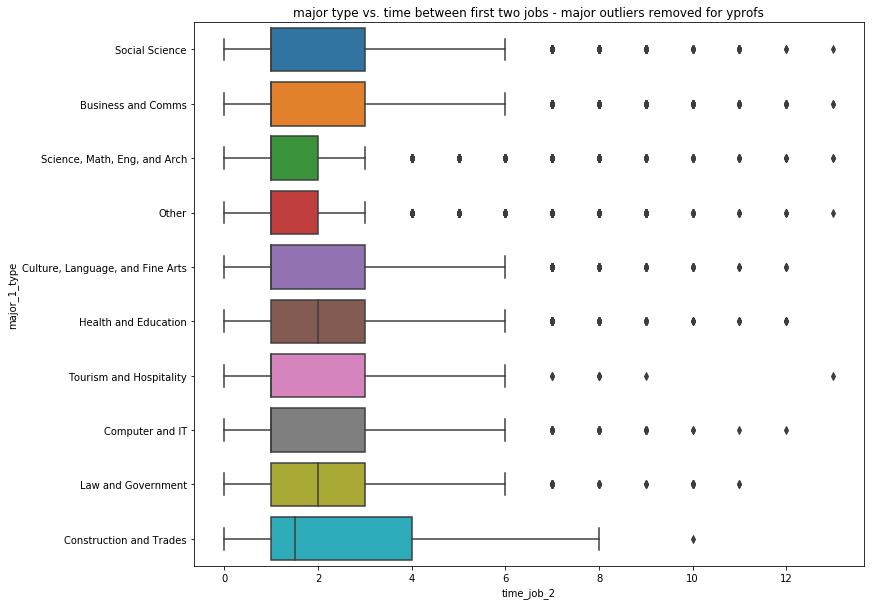

In [95]:
_ = plt.figure(figsize=(12,10))
_ = sns.boxplot(y='major_1_type', x='time_job_2', data = df_2013_yprofs, orient = 'h');
plt.title('major type vs. time between first two jobs - major outliers removed for yprofs');
plt.show()

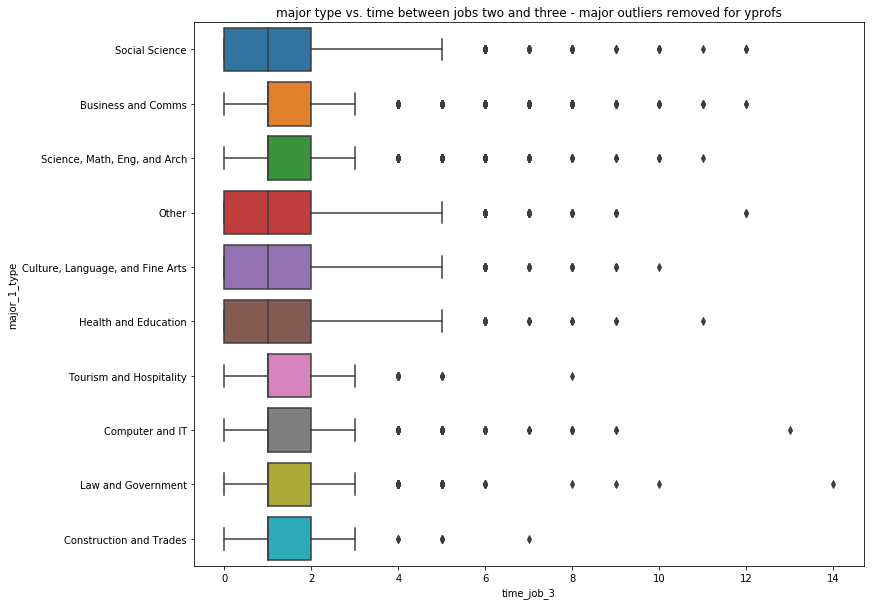

In [96]:
_ = plt.figure(figsize=(12,10))
_ = sns.boxplot(y='major_1_type', x='time_job_3', data = df_2013_yprofs, orient = 'h');
plt.title('major type vs. time between jobs two and three - major outliers removed for yprofs');
plt.show()

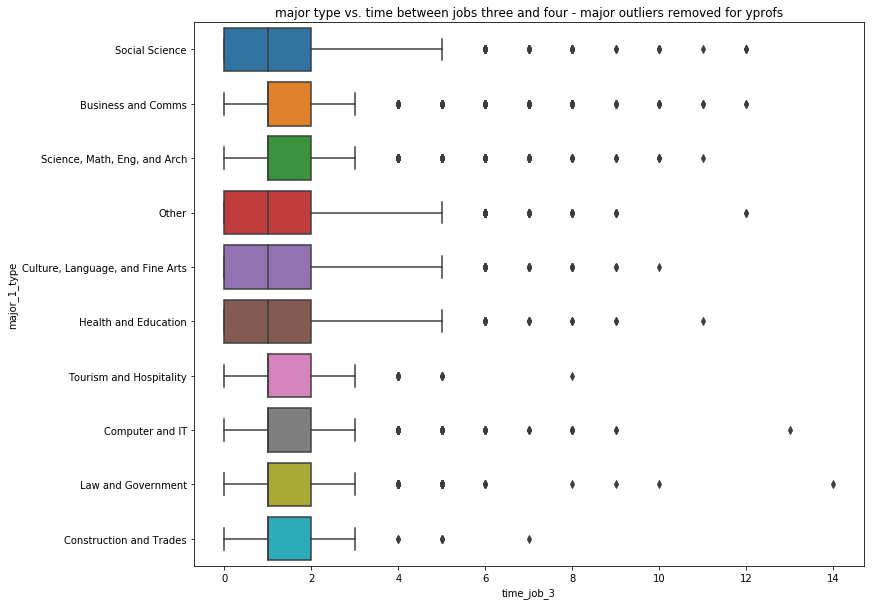

In [97]:
_ = plt.figure(figsize=(12,10))
_ = sns.boxplot(y='major_1_type', x='time_job_3', data = df_2013_yprofs, orient = 'h');
plt.title('major type vs. time between jobs three and four - major outliers removed for yprofs');
plt.show()

From our plots above, we can observe that there might be a trend towards decreasing time spent between jobs as job #s increase among our graduate sample, with a wider spread of time spent noticable among graduates in Social Science, CLFA, and Health and Education. 

### Skills Structure Inference
What we're mostly interested in exploring in for this project is trends associated with skills structure. We take a look now at looking deeper at which skills are listed most and least frequently by this cohort. 

In [105]:
df_2013_yprofs.skill_list.str.split(',', expand=True).stack().value_counts(normalize=True)[:20]

microsoft office      0.027560
customer service      0.022329
microsoft excel       0.021693
microsoft word        0.018871
powerpoint            0.017856
leadership            0.017084
public speaking       0.016764
research              0.015885
teamwork              0.015309
social media          0.015120
time management       0.013712
event planning        0.010928
management            0.010345
sales                 0.008439
marketing             0.007440
team leadership       0.006963
social networking     0.006404
project management    0.006000
communication         0.005916
data analysis         0.005767
dtype: float64

In [109]:
# testing to see if a more refined cut of this data (those with Masters degrees) brings out any other skills structure
df_ma = df_2013_yprofs[df_2013_yprofs.ma == 1]

In [110]:
df_ma.head()

,id,country,job_1,job_2,job_3,job_4,job_5,job_6,employer_1,employer_2,...,degree_count,time_job_2,time_job_3,time_job_4,time_job_1_4,skill_list,ba,ma,do,Ot
34,ZnLOAQ7HvtwVpjjoDvZwEQ_0000,US,power electronics engineer intern,graduate research assistant,investigator,"intelligent vehicle engineer, grid/localizatio...",slam and control algorithms consultant,autonomous driving application engineer,state grid corporation of china,arizona state university,...,2,1.0,1.0,2.0,4.0,"powerpoint,linux,algorithms,self driving car,c...",1,1,0,0
191,oruVoGTPGSh6Nh-Y5Bk5jg_0000,US,intern to the honorable john cherry,fellowship vice president,intern,intern for senator bob casey,administrative assistant,client relations specialist,dauphin county court of common pleas,alpha phi omega national service fraternity,...,3,1.0,0.0,1.0,2.0,"leadership,government administration,powerpoin...",1,1,0,1
264,oAI58ZUIJ7xK6BfjmkVC-A_0000,US,team leader,direct care,human resources,service team lead,interior design intern,NaN,lock haven university mountainserve office,lakeshore community service,...,3,1.0,1.0,2.0,4.0,"leadership,microsoft office,teamwork,microsoft...",1,1,0,0
342,AhJhXUbttcNKHSRUA-mh6w_0000,US,trainee,summer trainee,apc engineer,technical trainee,student technician,process safety student co-op,meghmani finechem limited,gail (india) limited,...,2,1.0,1.0,0.0,2.0,"powerpoint,c,windows,matlab,chemical engineeri...",1,1,0,0
463,lVqJ-VPVMepVgzHxmMj-Ww_0000,US,lead assistant tutor,undergraduate admissions student office assistant,pricing and competitive analysis intern,financial surveillance and company licensing i...,tax & admin intern,financial analyst,kumon,bentley university,...,2,2.0,1.0,1.0,4.0,"mathematics,auditing,writing,learning center,o...",1,1,0,0


In [108]:
# do young professionals with masters have more advanced skills? 
df_ma.skill_list.str.split(',', expand=True).stack().value_counts(normalize=True)[:20]

microsoft office      0.025594
microsoft excel       0.020048
research              0.019888
public speaking       0.016830
powerpoint            0.016489
microsoft word        0.016153
customer service      0.015115
leadership            0.014438
teamwork              0.012344
social media          0.011012
time management       0.009483
data analysis         0.009089
event planning        0.008721
management            0.008663
teaching              0.006867
project management    0.006335
community outreach    0.005749
matlab                0.005706
team leadership       0.004672
communication         0.004630
dtype: float64

### Conclusion: 
Before anything further can be done on our research themes, we will attempt to give our skills column more structure (as our primary "y" variable under consideration) by clustering skills and return to conducting inferential statistics on themes such as level and type of work experience, industry of employent and education.  

In [ ]:
### to be continued...